In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from helpers.texts import *

### Loading datasets

In [34]:
tennis_questions = pd.read_csv('test_datasets\questions.tsv.gz', sep='\t', compression='gzip').dropna()
display(tennis_questions.sample(5))

big_bang_theory = pd.read_csv('test_datasets/big_bang_theory.csv').dropna()
display(big_bang_theory.sample(5))

,questions,ranking,similarity,gender
293,tennis --ENT-- know clothing line deals --ENT-...,786,0.298855,F
2978,match question mom captain --ENT-- --ENT-- cha...,862,0.863660,M
1102,know --PRON--,29,0.236620,F
2292,year played --ENT-- fans loved couple words ex...,910,0.662396,M
784,having hotel close special tournaments,780,0.496199,F


,season,episode,scene,character,text,id,formatted_text,number of words
35474,8,12,The apartment,Amy,"Ooh, the philharmonic is playing Beethoven dow...",S08E12,ooh the philharmonic is playing beethoven dow...,9
42525,9,22,The apartment,Amy,"Well, I’m going. You couldn’t stop me from get...",S09E22,well i m going you couldn t stop me from get...,27
11492,3,14,A children’s play area,Leonard,"Yeah, well, he’s extra special. Hey, Shelly. W...",S03E14,yeah well he s extra special hey shelly w...,17
46082,10,14,Raj’s apartment,Howard,"Oh, wow. Don’t let him get away.",S10E14,oh wow don t let him get away,11
25305,6,10,Amy’s apartment,Sheldon,"Great. Now, this may look like a Tic Tac, but ...",S06E10,great now this may look like a tic tac but ...,32


### Binary classification

In this first example, we show how to use the helper functions to perform binary classification (i.e. predicting labels than can only take two values, here either "M" or "F").

In [35]:
tp, fp, fn, tn = binary_classify_based_on_text(
    df=tennis_questions,
    text_col_name='questions',
    label_col_name='gender',
)

accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f"The accuracy of the model for predicting the gender based on the question is: {accuracy:.2%}")
print(f"Number of estimations made: {tp + tn + fp + fn}")

The accuracy of the model for predicting the gender based on the question is: 71.25%
Number of estimations made: 1200


### Regression

In this second example, we show how to use the helper functions to perform regression (i.e. predicting a continuous variable).

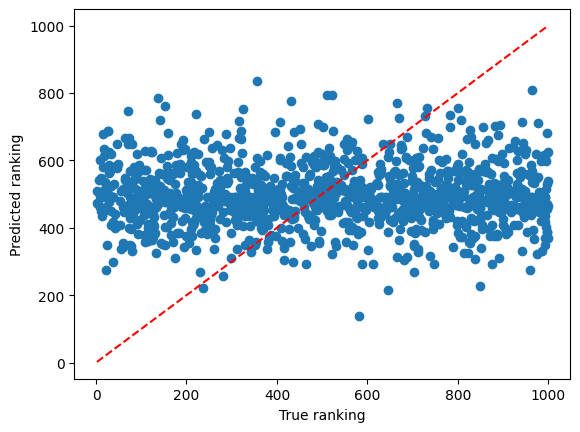

In [36]:
y_true, y_pred = regression_based_on_text(
    df=tennis_questions,
    text_col_name='questions',
    label_col_name='ranking',
)
plt.scatter(y_true, y_pred)
plt.plot([np.min(y_true), np.max(y_true)], [np.min(y_true), np.max(y_true)], 'r--')
plt.xlabel('True ranking')
plt.ylabel('Predicted ranking')
plt.show()

### Multi-class classification

In this third example, we show how to use the helper functions to perform multi-class classification (i.e. predicting labels than can take more than two values, here one class for each character of the TV show "Big Bang Theory").

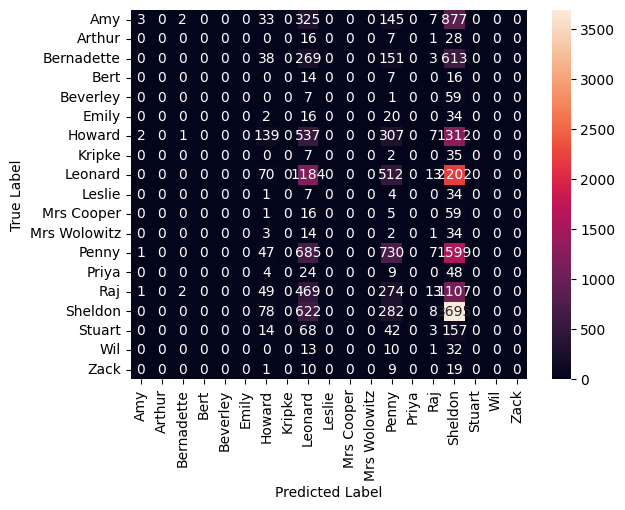

In [37]:
cm, classes = classify_based_on_text(
    df=big_bang_theory,
    text_col_name='formatted_text',
    label_col_name='character',
)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()